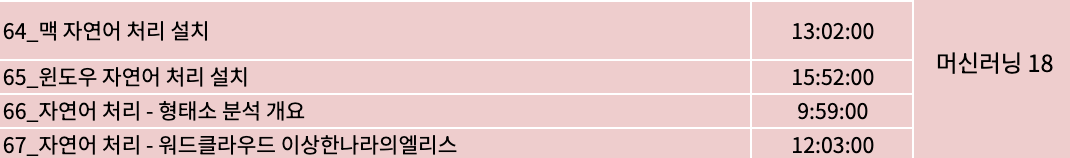

In [1]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, accuracy_score, recall_score, precision_score, 
                             roc_auc_score, f1_score, roc_curve, mean_squared_error,
                            classification_report, confusion_matrix, precision_recall_curve)
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler,  Binarizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import sympy as sym
import statsmodels.api as sm

from konlpy.tag import Kkma, Hannanum, Twitter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# 1. NLP (Natural Language Processing)

## 📍 KoNLPy

- KoNLPy: 쉽고 간결한 한국어 정보처리 파이썬 패키지
- 출처: http://hclt.kr/symp/?intpg=2&lnb=conference

### ⚡️ 개요
- NLTK 덕에 파이썬으로 자연어처리를 하는 것이 편리해졌다. 
- 단, 한국어만 분석하려하지 않는다면, 파이썬으로 한국어를 분석할 수는 없을까?
- 국문, 영문, 중문 등 다양한 문자가 섞여 있는 문서는 어떻게 분석할 수 있을까?
- 이 발표에서는 자연어처리의 기초적인 개념을 다룬 후, NLTK 등의 자연어처리 라이브러리와 한국어 분석을 위해 개발중인 KoNLPy를 소개한다.
- 또, 파이썬으로 한국어 분석할 때 유용한 몇 가지 트릭을 공유한다.

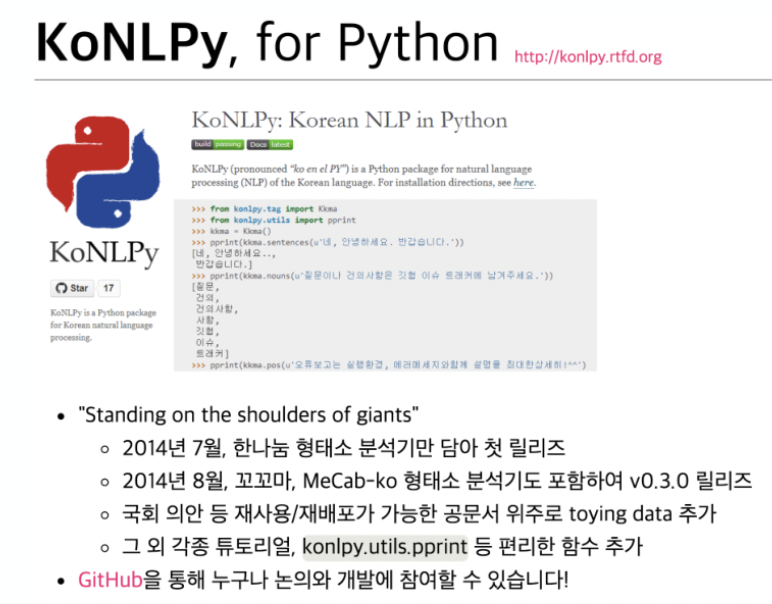

### ⚡️ Kkma

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# 마침표가 없어도 문장으로 구분할 줄 안다.
kkma.sentences("한국어 분석을 시작합니다 재밌어요~~")

['한국어 분석을 시작합니다', '재밌어요~~']

In [4]:
# 명사 분석
kkma.nouns("한국어 분석을 시작합니다 재밌어요~~")

['한국어', '분석']

In [5]:
# 형태소 분석을 진행
kkma.pos("한국어 분석을 시작합니다 재밌어요~~")

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재밌', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

### ⚡️ Hannaum

In [6]:
from konlpy.tag import Hannanum

# 한나눔 엔진
hannanum = Hannanum()

In [7]:
hannanum.nouns("한국어 분석을 시작합니다 재밌어요~~")

['한국어', '분석', '시작', '재밌어요']

In [8]:
hannanum.morphs("한국어 분석을 시작합니다 재밌어요~~")

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재밌어요', '~~']

In [9]:
hannanum.pos("한국어 분석을 시작합니다 재밌어요~~")

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재밌어요', 'N'),
 ('~~', 'S')]

### ⚡️ Twitter

In [10]:
from konlpy.tag import Twitter

t = Twitter()

/Users/seokminlee/opt/anaconda3/envs/tf/lib/python3.9/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
t.nouns("한국어 분석을 시작합니다 재밌어요~~")

['한국어', '분석', '시작']

In [12]:
t.morphs("한국어 분석을 시작합니다 재밌어요~~")

['한국어', '분석', '을', '시작', '합니다', '재밌어요', '~~']

In [13]:
t.pos("한국어 분석을 시작합니다 재밌어요~~")

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재밌어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 📍 Word Cloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open("./06_alice.txt").read()
alice_mask = np.array(Image.open("./06_alice_mask.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [16]:
# 한글꺠짐 방지
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False # 3번

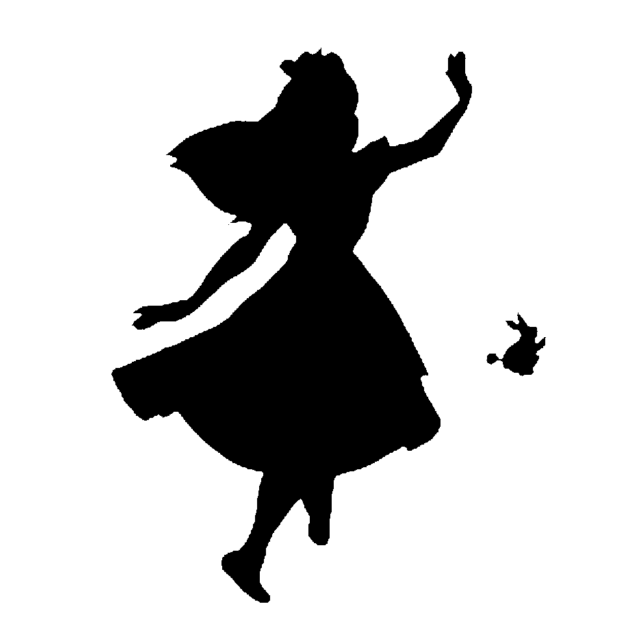

In [17]:
plt.figure(figsize=(8, 8))
# image show = imshow
# interpolation="bilinear"은 이미지를 화면에 표시할 때 픽셀 간의 값을 보간하는 방식을 지정하는 인수입니다.
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation="bilinear")

plt.axis("off")
plt.show()

In [18]:
# WordCloud 모듈은 자체적으로 단어를 추출해서  
# 빈도수를 조사하고 정규화하는 기능을 가지고 있다.

wc = WordCloud(background_color="white", max_words=2000,
              mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
wc.words_ # 발생 빈도

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

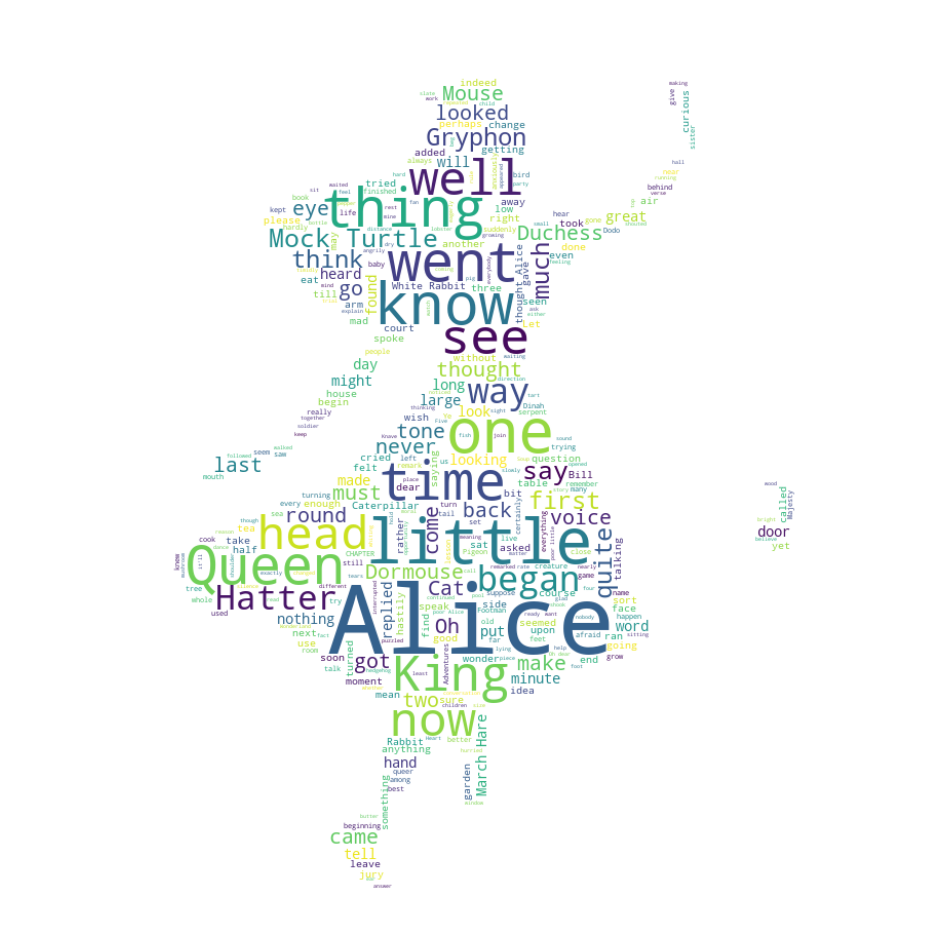

In [19]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()